# 5. Arreglos multidimensionales
> Por Arturo Erdely

Recordemos algunos los numéricos analizados hasta el momento:

In [ ]:
typeof.((true, 1, 1.0, 1//1, 1 + 1im, 1.0 + 1.0im, 1//1 + 1//1*im))

Crear un arreglo de ceros tipo *entero* con dimensiones $2\times 3$:

In [ ]:
A = zeros(Int64, 2, 3)

De hecho bastaría con escribir `Int` y automáticamente se asignará el tipo `Int64` si se trata de una computadora a 64 bits, o bien el tipo `Int32` si es a 32 bits:

In [ ]:
A = zeros(Int, 2, 3)

Ahora un arreglo de unos tipo *racional* con dimensiones $3\times 2$:

In [ ]:
B = ones(Rational{Int64}, 3, 2)

Un arreglo de tipo *Booleano* con puros falsos, dimensiones $1\times 3$:

In [ ]:
C = falses(1, 3)

Booleano pero con verdaderos, dimensiones $3\times 1$:

In [ ]:
D = trues(3, 1)

Arreglo de ceros de tipo *punto flotante* de dimensiones $2\times 3\times 4$:

In [ ]:
E = zeros(Float64, 2, 3, 4)

De hecho, si no se especifica el tipo numérico, por defecto es de punto flotante:

In [ ]:
E = zeros(2, 3, 4)

Una vez creado un arreglo, basta con especificar cada entrada mediante sus coordenadas entre corteches y separando por comas:

In [ ]:
G = zeros(3,4)

In [ ]:
G[2, 3] = π

In [ ]:
G

In [ ]:
G[2, 3]

Modificar una fila completa:

In [ ]:
G[1, :] = [1, 2, 3, 4]

In [ ]:
G

Modificar una columna:

In [ ]:
G[: , 2] = ℯ # error porque falta un punto antes del símbolo `=` para vectorizar la asignación

In [ ]:
G[: , 2] .= ℯ 

In [ ]:
G

Obtener submatrices:

In [ ]:
G[2:3, 3:4]

In [ ]:
G[[1, 3], [2, 4]]

Nótese que así puede defirse un arreglo de $3\times 1$:

In [ ]:
a = zeros(Int, 3, 1)

Pero no es mismo que un vector:

In [ ]:
v = [0, 0, 0]

In [ ]:
a == v

Y así puede definirse un arreglo de $1\times 3$:

In [ ]:
[1 2 3]

O así uno de $2\times 3$:

In [ ]:
[1 2 3; 4 5 6]

También es posible crear arreglos de esta forma:

In [1]:
H = fill(9, 3, 5)

3×5 Matrix{Int64}:
 9  9  9  9  9
 9  9  9  9  9
 9  9  9  9  9

También es posible crear **vectores o arreglos de funciones**, por ejemplo:

In [5]:
f(x) = 2x + 1
g(x) = x^2
h(x) = x^3 

h (generic function with 1 method)

In [6]:
I = [f, g, h]

3-element Vector{Function}:
 f (generic function with 1 method)
 g (generic function with 1 method)
 h (generic function with 1 method)

In [7]:
I[2](5)

25

Crearemos un arreglo `J` de funciones, como composición de pares de funciones del vector de funciones `I`:

In [8]:
J = Array{Function, 2}(undef, 3, 3)

3×3 Matrix{Function}:
 #undef  #undef  #undef
 #undef  #undef  #undef
 #undef  #undef  #undef

In [4]:
L = Array{Function}(f(x),g(x),2,1)

LoadError: UndefVarError: x not defined

In [2]:
?Array

search: Array SubArray BitArray DenseArray StridedArray PermutedDimsArray



```
Array{T,N} <: AbstractArray{T,N}
```

`N`-dimensional dense array with elements of type `T`.

---

```
Array{T}(undef, dims)
Array{T,N}(undef, dims)
```

Construct an uninitialized `N`-dimensional [`Array`](@ref) containing elements of type `T`. `N` can either be supplied explicitly, as in `Array{T,N}(undef, dims)`, or be determined by the length or number of `dims`. `dims` may be a tuple or a series of integer arguments corresponding to the lengths in each dimension. If the rank `N` is supplied explicitly, then it must match the length or number of `dims`. See [`undef`](@ref).

# Examples

```julia-repl
julia> A = Array{Float64, 2}(undef, 2, 3) # N given explicitly
2×3 Array{Float64, 2}:
 6.90198e-310  6.90198e-310  6.90198e-310
 6.90198e-310  6.90198e-310  0.0

julia> B = Array{Float64}(undef, 2) # N determined by the input
2-element Array{Float64, 1}:
 1.87103e-320
 0.0
```

---

```
Array{T}(nothing, dims)
Array{T,N}(nothing, dims)
```

Construct an `N`-dimensional [`Array`](@ref) containing elements of type `T`, initialized with [`nothing`](@ref) entries. Element type `T` must be able to hold these values, i.e. `Nothing <: T`.

# Examples

```jldoctest
julia> Array{Union{Nothing, String}}(nothing, 2)
2-element Vector{Union{Nothing, String}}:
 nothing
 nothing

julia> Array{Union{Nothing, Int}}(nothing, 2, 3)
2×3 Matrix{Union{Nothing, Int64}}:
 nothing  nothing  nothing
 nothing  nothing  nothing
```

---

```
Array{T}(missing, dims)
Array{T,N}(missing, dims)
```

Construct an `N`-dimensional [`Array`](@ref) containing elements of type `T`, initialized with [`missing`](@ref) entries. Element type `T` must be able to hold these values, i.e. `Missing <: T`.

# Examples

```jldoctest
julia> Array{Union{Missing, String}}(missing, 2)
2-element Vector{Union{Missing, String}}:
 missing
 missing

julia> Array{Union{Missing, Int}}(missing, 2, 3)
2×3 Matrix{Union{Missing, Int64}}:
 missing  missing  missing
 missing  missing  missing
```


In [6]:
for i ∈ 1:3
    for j ∈ 1:3
        J[i, j] = I[i] ∘ I[j]
    end
end
J

3×3 Matrix{Function}:
 f ∘ f  f ∘ g  f ∘ h
 g ∘ f  g ∘ g  g ∘ h
 h ∘ f  h ∘ g  h ∘ h

In [7]:
J[2, 3]

g ∘ h

In [8]:
J[1, 2](10), (f ∘ g)(10)

(201, 201)

## 5.1 Transformaciones

In [9]:
K = zeros(3, 4)

3×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [10]:
L = K # L se convierte en un espejo de K, y viceversa
M = copy(K) # M es una copia independiente de K

3×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [11]:
K

3×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [12]:
L

3×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [13]:
M

3×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [14]:
K[2, 1] = π
K

3×4 Matrix{Float64}:
 0.0      0.0  0.0  0.0
 3.14159  0.0  0.0  0.0
 0.0      0.0  0.0  0.0

In [15]:
L

3×4 Matrix{Float64}:
 0.0      0.0  0.0  0.0
 3.14159  0.0  0.0  0.0
 0.0      0.0  0.0  0.0

In [16]:
M

3×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [17]:
L[3, 4] = ℯ
L

3×4 Matrix{Float64}:
 0.0      0.0  0.0  0.0
 3.14159  0.0  0.0  0.0
 0.0      0.0  0.0  2.71828

In [18]:
K

3×4 Matrix{Float64}:
 0.0      0.0  0.0  0.0
 3.14159  0.0  0.0  0.0
 0.0      0.0  0.0  2.71828

In [19]:
tK = transpose(K) # transpuesta

4×3 transpose(::Matrix{Float64}) with eltype Float64:
 0.0  3.14159  0.0
 0.0  0.0      0.0
 0.0  0.0      0.0
 0.0  0.0      2.71828

In [20]:
rK = reshape(K, 6, 2)
vK = vec(rK);

In [21]:
K

3×4 Matrix{Float64}:
 0.0      0.0  0.0  0.0
 3.14159  0.0  0.0  0.0
 0.0      0.0  0.0  2.71828

In [22]:
rK

6×2 Matrix{Float64}:
 0.0      0.0
 3.14159  0.0
 0.0      0.0
 0.0      0.0
 0.0      0.0
 0.0      2.71828

In [23]:
vK

12-element Vector{Float64}:
 0.0
 3.141592653589793
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 2.718281828459045

Rellenar mediante una sucesión:

In [24]:
1:12

1:12

In [25]:
collect(1:12)

12-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12

In [26]:
N = reshape(collect(1:12), 3, 4)

3×4 Matrix{Int64}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [27]:
P = transpose(reshape(collect(1:12), 4, 3))

3×4 transpose(::Matrix{Int64}) with eltype Int64:
 1   2   3   4
 5   6   7   8
 9  10  11  12

Obtener información sobre un arreglo:

In [28]:
ndims(P)

2

In [29]:
size(P)

(3, 4)

In [30]:
typeof(P)

LinearAlgebra.Transpose{Int64, Matrix{Int64}}

In [31]:
eltype(P)

Int64

## 5.2 Operaciones

Aplicar una función a todas los elementos de un arreglo:

In [32]:
ℓ(x) = x^2 + 1

ℓ (generic function with 1 method)

In [33]:
ℓ.(P)

3×4 Matrix{Int64}:
  2    5   10   17
 26   37   50   65
 82  101  122  145

In [34]:
P

3×4 transpose(::Matrix{Int64}) with eltype Int64:
 1   2   3   4
 5   6   7   8
 9  10  11  12

In [35]:
P + 1 # error, porque falta vectorizar la operación

LoadError: MethodError: no method matching +(::LinearAlgebra.Transpose{Int64, Matrix{Int64}}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  +([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at int.jl:87
[0m  +([91m::T[39m, ::Integer) where T<:AbstractChar at char.jl:223
[0m  ...

In [36]:
P .+ 1

3×4 Matrix{Int64}:
  2   3   4   5
  6   7   8   9
 10  11  12  13

In [37]:
(P .+ 1) .≤ 8

3×4 BitMatrix:
 1  1  1  1
 1  1  1  0
 0  0  0  0

In [38]:
P

3×4 transpose(::Matrix{Int64}) with eltype Int64:
 1   2   3   4
 5   6   7   8
 9  10  11  12

In [39]:
Q = 100 .* P

3×4 Matrix{Int64}:
 100   200   300   400
 500   600   700   800
 900  1000  1100  1200

In [40]:
P + Q

3×4 Matrix{Int64}:
 101   202   303   404
 505   606   707   808
 909  1010  1111  1212

In [41]:
P .* Q # multiplicación P[i, j]*Q[i,j]

3×4 Matrix{Int64}:
  100    400    900   1600
 2500   3600   4900   6400
 8100  10000  12100  14400

In [42]:
R = reshape(collect(1:9), 3, 3)

3×3 Matrix{Int64}:
 1  4  7
 2  5  8
 3  6  9

In [43]:
S = 100 .* R

3×3 Matrix{Int64}:
 100  400  700
 200  500  800
 300  600  900

In [44]:
R .* S # multiplicación P[i, j]*Q[i,j]

3×3 Matrix{Int64}:
 100  1600  4900
 400  2500  6400
 900  3600  8100

In [45]:
R * S # multiplicación de matrices

3×3 Matrix{Int64}:
 3000  6600  10200
 3600  8100  12600
 4200  9600  15000

In [46]:
T = rand(3, 3) # rellenar con números pseudoaleatorios con distribución Uniforme(0,1)

3×3 Matrix{Float64}:
 0.295472  0.148091  0.381601
 0.650459  0.434262  0.597401
 0.267837  0.289802  0.229698

In [47]:
invT = inv(T)

3×3 Matrix{Float64}:
 -9.86699  10.2964   -10.3869
  1.42494  -4.61725    9.64132
  9.70751  -6.18063    4.30094

In [48]:
round.(T * invT, digits = 4)

3×3 Matrix{Float64}:
 1.0  0.0   0.0
 0.0  1.0  -0.0
 0.0  0.0   1.0

# Ejemplo

In [8]:
function fibonacci2(máximo)
    ant = 0
    sig = 1
    contador = 2
    while sig ≤ máximo
        fib = ant + sig
        ant = sig
        sig = fib
        contador+=1
        
    end
    print(contador)
    v = zeros(Int,contador)
    v[2] = 1
    for i in 3:contador
        v[i] = v[i-1]+v[i-2]
    end
    return v # o bien podría omitirse
end     

fibonacci2 (generic function with 1 method)

In [9]:
fibonacci2(100)

13

13-element Vector{Int64}:
   0
   1
   1
   2
   3
   5
   8
  13
  21
  34
  55
  89
 144

In [10]:
v

LoadError: UndefVarError: v not defined

In [11]:
using Plots

In [12]:
plot(v)

LoadError: UndefVarError: v not defined

In [56]:
?append!

search: append!



```
append!(collection, collections...) -> collection.
```

For an ordered container `collection`, add the elements of each `collections` to the end of it.

!!! compat "Julia 1.6"
    Specifying multiple collections to be appended requires at least Julia 1.6.


# Examples

```jldoctest
julia> append!([1], [2, 3])
3-element Vector{Int64}:
 1
 2
 3

julia> append!([1, 2, 3], [4, 5], [6])
6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
```

Use [`push!`](@ref) to add individual items to `collection` which are not already themselves in another collection. The result of the preceding example is equivalent to `push!([1, 2, 3], 4, 5, 6)`.

See [`sizehint!`](@ref) for notes about the performance model.


## Tarea

Programar una tercera version de **fibonacci** utilizando la instrucción 'append!' de modo que se inicie un vector de longitud 2 [0,1] y que termine entregando un vector con todos los elementos de la sucesión del tipo [0,1,1,2,...] o bien utulizando el operador de union.

In [19]:
function fibonacci3(máximo)
    ant = 0
    sig = 1
    lista1 = [ant,sig]
    #print(ant, " ", sig)
    while sig ≤ máximo
        fib = ant + sig
        ant = sig
        sig = fib
        print(" ", fib)
        append!(lista1,fib)
    end
    return lista1
end     

fibonacci3 (generic function with 1 method)

In [20]:
fibonacci3(100)

 1 2 3 5 8 13 21 34 55 89 144

13-element Vector{Int64}:
   0
   1
   1
   2
   3
   5
   8
  13
  21
  34
  55
  89
 144

In [21]:
print(lista1)

LoadError: UndefVarError: lista1 not defined

In [22]:
function fibonacci3(maximo)
    v = [0,1]
    

LoadError: syntax: incomplete: "function" at In[22]:1 requires end

In [23]:
plot(lista1)

LoadError: UndefVarError: lista1 not defined

 1 2 3 5 8 13 21 34 55 89 144

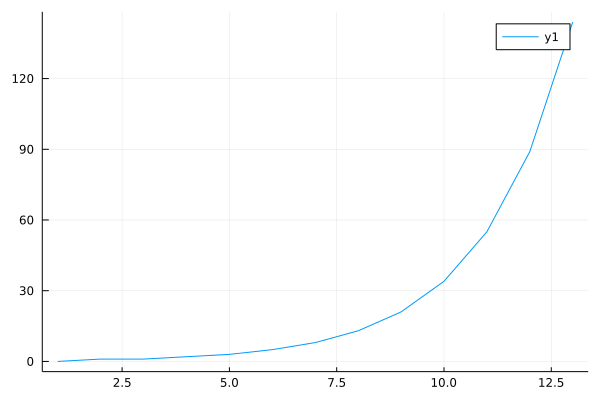

In [24]:
plot(fibonacci3(100))